<a href="https://colab.research.google.com/github/Netri-100224/EDA-Retail-Data-Analysis/blob/main/EDA_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME: Neha Tripathi
##THE SPARKS FOUNDATION
###Data Science and Business Analytics Intern GRIP MARCH 2023
###Task 3: Exploratory Data Analysis - Retail

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import plotly.graph_objs as go
from plotly.offline import iplot 
%matplotlib inline

import warnings
warnings.filterwarnings(action= 'ignore')

In [ ]:
df=pd.read_csv('/content/SampleSuperstore.csv')

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 13)

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**DATA CLEANING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.drop(['Postal Code'],axis=1,inplace=True)
df.drop(['Country'],axis=1,inplace=True)

In [ ]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.duplicated().sum()

50

In [ ]:
df.drop_duplicates(inplace=True)

**Conclusion:**


*   No null values are observed.
*   Postal Code and Country columns are dropped because they do not show any influence in data analysis.




<AxesSubplot:>

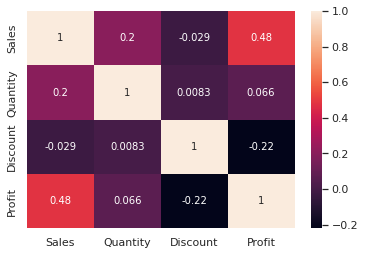

In [ ]:
corr = df.corr()
sns.heatmap(corr,annot=True)

**Conclusion:**
As we can deduce from above graph, Sales and profit are **positively correlated** by a factor of **0.48**,which means profit increases with increase in sales.Same way discount and profit are **negatively correlated** by a factor of **-0.22** which means that profit decreases when discount increases.


<AxesSubplot:xlabel='Sales'>

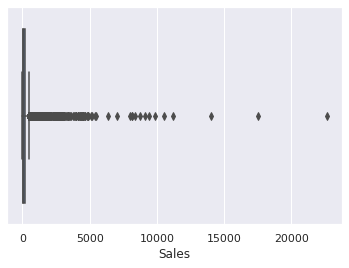

In [ ]:
sns.boxplot(df['Sales'])



* We can see there are various outliers in our data.  




In [ ]:
print(df['Sales'].skew())
print(df['Sales'].kurt())

12.946426610238083
304.02088040293194


In [ ]:
x=df['Sales'].max()

In [ ]:
print(x)

22638.48


<AxesSubplot:xlabel='Sales', ylabel='Density'>

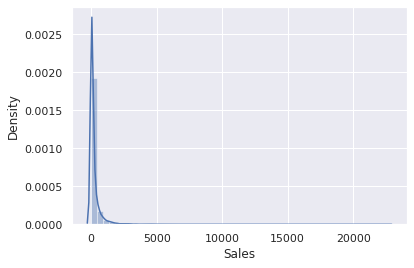

In [ ]:
sns.distplot(df['Sales'])

 
*   Graph is positively skewed where maximum sales is**22638.48**.

*   This distribution with a higher kurtosis has a heavier tail and not concentrated near mean.



**Better Visualization of above graph**

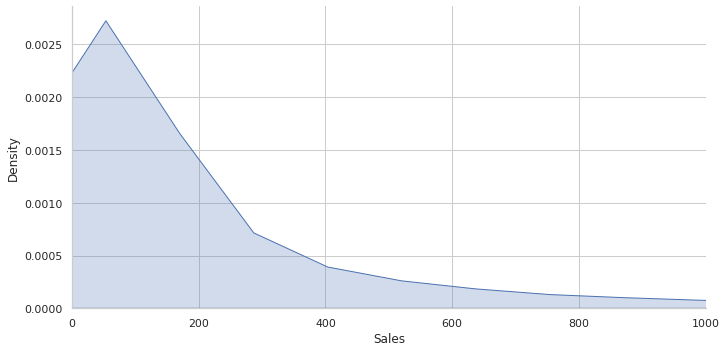

In [ ]:
sns.set_style("whitegrid")
ax = sns.displot(data=df,
                 x='Sales', kind='kde', fill=True, height=5, aspect=2)
# Here you can define the x limit    
ax.set(xlim=(0,1000))

 Distplot Graph is positively skewed where maximum sales is**22638.48**.
 Second distplot graph shows elaborated version of first.We conclude that maximun=m number of sales is from **0-400**.

##**Checking for outliers.**

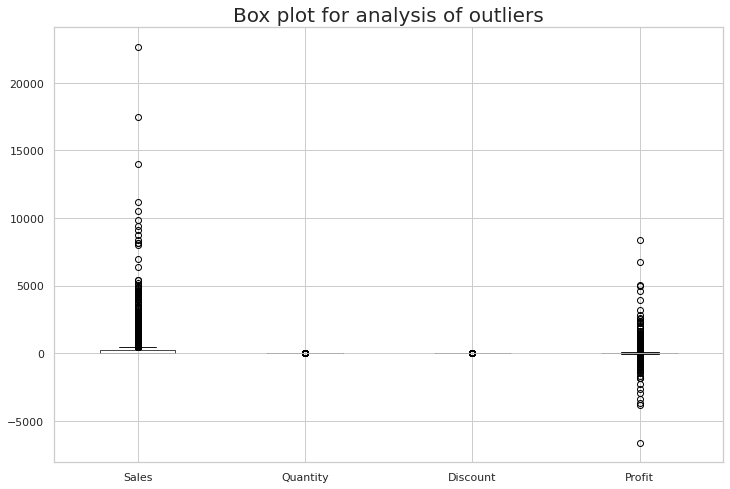

In [ ]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.title("Box plot for analysis of outliers",fontsize=20)
plt.show()

In [ ]:

print(np.where(df['Sales']>10000))

(array([2621, 2695, 4181, 6800, 8114]),)


In [ ]:
print(np.where(df['Profit']>4500))
print(np.where((df['Profit']<-4500)))

(array([4091, 4181, 6800, 8114, 8996]),)
(array([7736]),)


Although **Sales** and **profit** column have outliers, yet they are very small in numbers so there is no use in removing them.

In [ ]:
df['Segment'].value_counts()

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

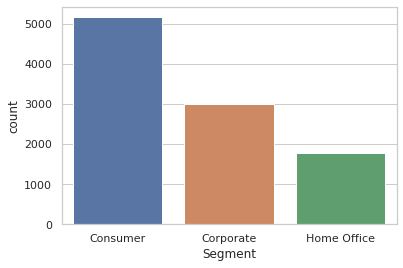

In [ ]:
sns.countplot(x=df['Segment'])

In [ ]:
df['Ship Mode'].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

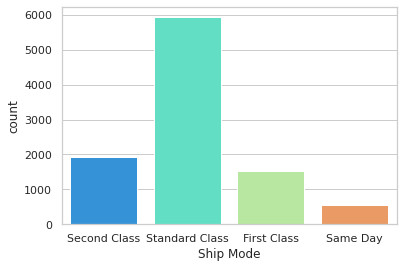

In [ ]:
sns.countplot(x = 'Ship Mode',data = df, palette = 'rainbow')

In [ ]:
df['Region'].value_counts()

West       3177
East       2832
Central    2315
South      1620
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

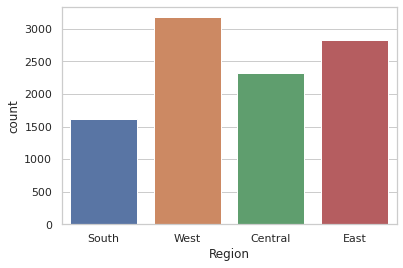

In [ ]:
sns.countplot(df['Region'])

<AxesSubplot:xlabel='Category', ylabel='count'>

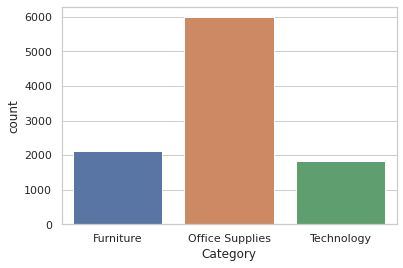

In [ ]:
sns.countplot(df['Category'])

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

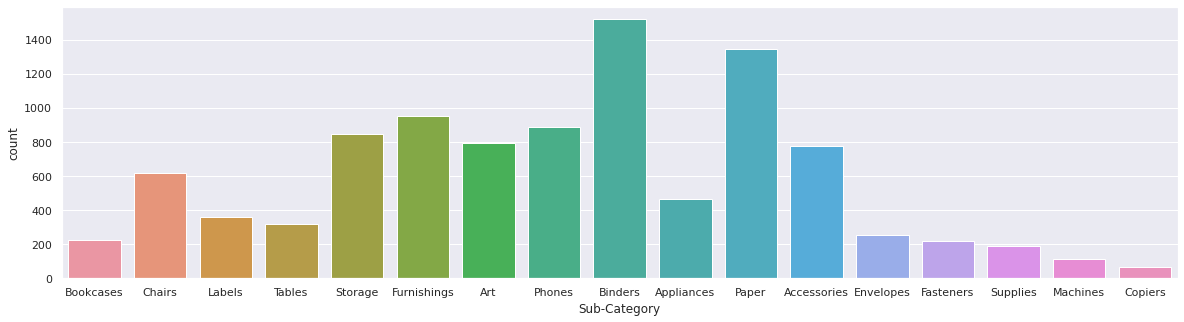

In [ ]:
sns.set(rc={"figure.figsize":(20, 5)})
sns.countplot(df['Sub-Category'])


**Conclusion:** 
1.   **Consumer Segment** has **maximum number** of count and mininum number is of Home Office.

1.   **Standard class** ship mode is **most prefered** and **same day** mode is **least prefered**.
2.   **Western Region** enjoys **maximum number** of orders whereas Southern region has minimum number of orders. 


4.   **Most ordered category** is **Office Supplies Category** and least 
ordered is Technology.



5.  **Binders** are  **most in-demand** products followed by paper and furnishings respectively.**Copiers** are **least in-demand** products followed by Machines,Supplies and Fasteners respectively.








##**Sales Analysis**

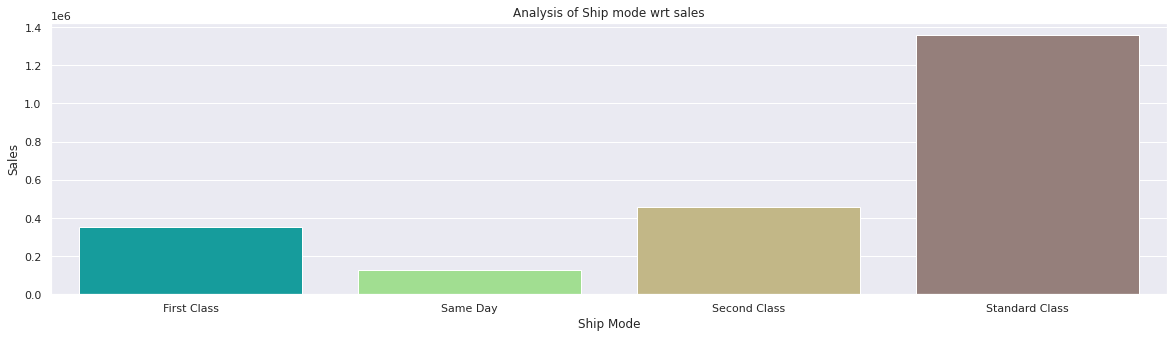

In [ ]:
x=df['Ship Mode'].unique()
x.sort()

y=df.groupby(['Ship Mode'])['Sales'].sum()
sns.barplot(x=x, y=y,palette="terrain")
plt.title("Analysis of Ship mode wrt sales")
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
plt.show()

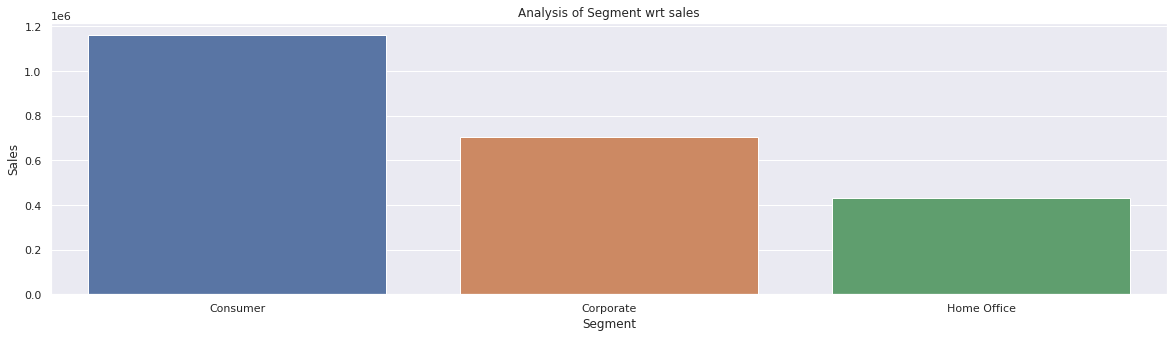

In [ ]:
x=df['Segment'].unique()
x.sort()

y=df.groupby(['Segment'])['Sales'].sum()
sns.barplot(x=x, y=y)
plt.title("Analysis of Segment wrt sales")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()

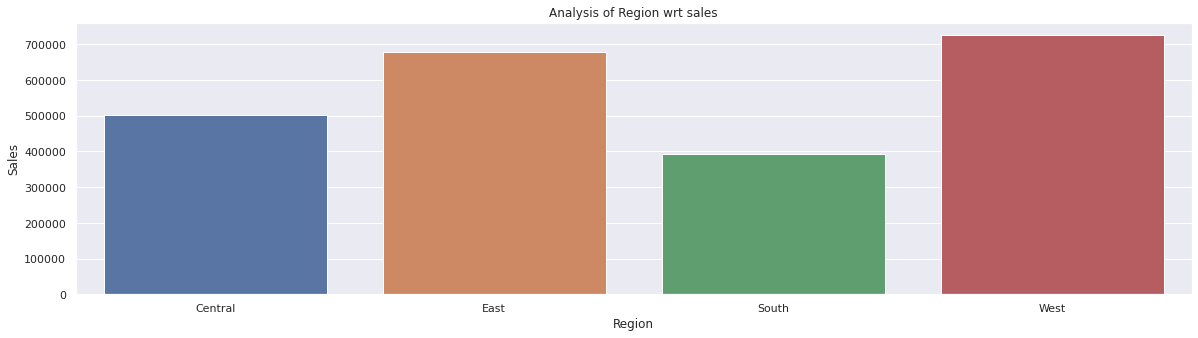

In [ ]:
x=df['Region'].unique()
x.sort()

y=df.groupby(['Region'])['Sales'].sum()
sns.barplot(x=x, y=y)
plt.title("Analysis of Region wrt sales")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

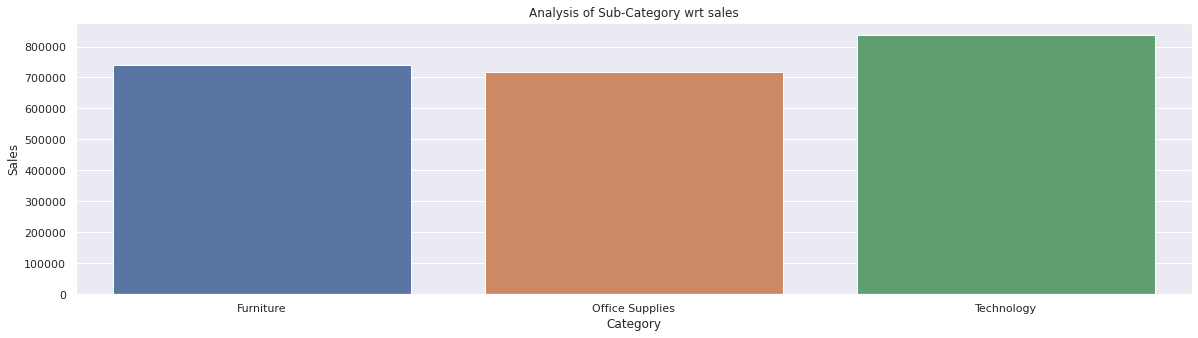

In [ ]:
x=df['Category'].unique()
x.sort()

y=df.groupby(['Category'])['Sales'].sum()

sns.barplot(x=x, y=y)
plt.title("Analysis of Sub-Category wrt sales")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

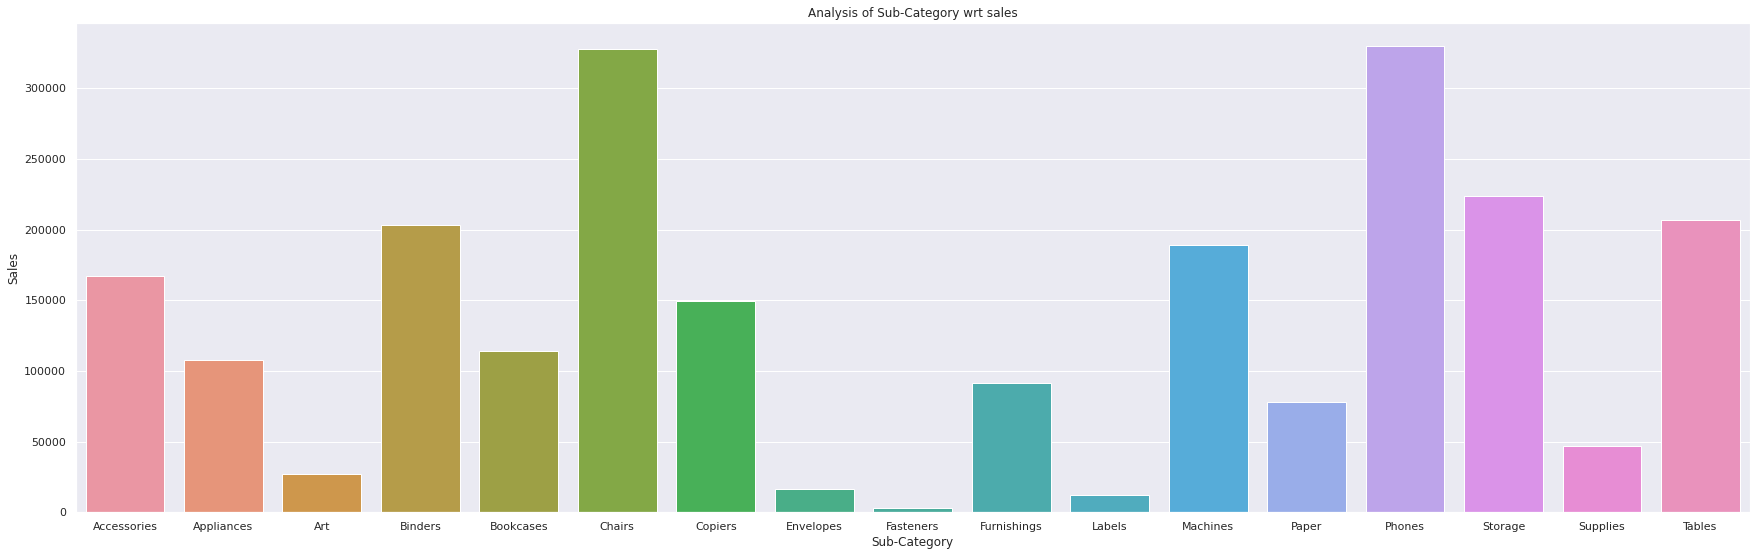

In [ ]:
x=df['Sub-Category'].unique()
x.sort()
y=df.groupby(['Sub-Category'])['Sales'].sum()
plt.figure(figsize=(30,9))

sns.barplot(x=x, y=y)
plt.title("Analysis of Sub-Category wrt sales")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.show()



**Conclusion:**
1.  Behaviour of ship mode, Segment and Region with sales is same as number of counts i.e(The company is keeping those products in stock which have Max sales.)

2.   **Technology** records **maximum sales** eventhough its count is very less.
Thus  technological goods contribute  in **maximum revenue of company**. 
3.   Office category has max number of counts but minimum sales.


4.   **Phones** contribute to maximum number of sales followed by chairs.Fasteners contribute to minimum number of sales.





##**Profit Analysis**

<Figure size 1440x648 with 0 Axes>

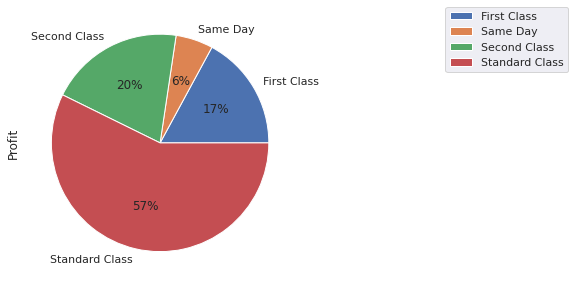

In [ ]:
plt.figure(figsize=(20,9))
df.groupby(['Ship Mode']).sum().plot(kind='pie', y='Profit', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(2, 1), loc='upper right', borderaxespad=0)

<Figure size 1440x648 with 0 Axes>

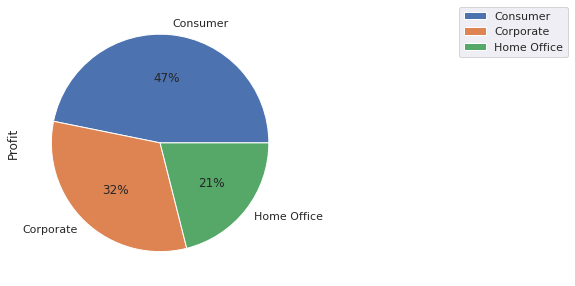

In [ ]:
plt.figure(figsize=(20,9))
df.groupby(['Segment']).sum().plot(kind='pie', y='Profit', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(2, 1), loc='upper right', borderaxespad=0)

<Figure size 1440x648 with 0 Axes>

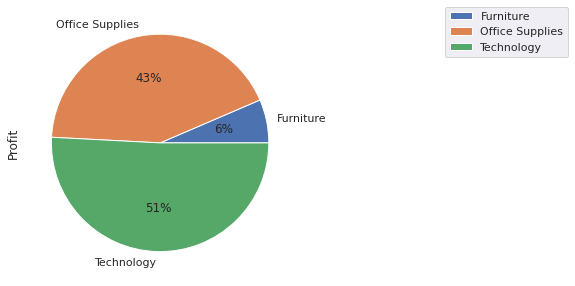

In [ ]:
plt.figure(figsize=(20,9))
df.groupby(['Category']).sum().plot(kind='pie', y='Profit', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(2, 1), loc='upper right', borderaxespad=0)

<Figure size 1440x648 with 0 Axes>

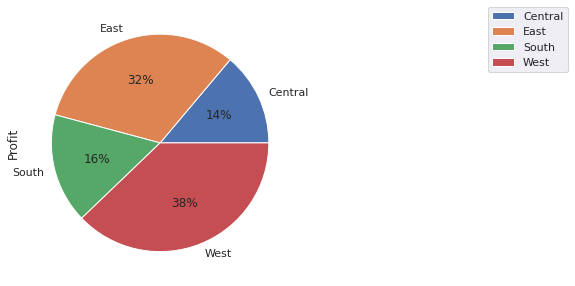

In [ ]:
plt.figure(figsize=(20,9))
df.groupby(['Region']).sum().plot(kind='pie', y='Profit', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(2, 1), loc='upper right', borderaxespad=0)

In [ ]:
prof_df = df.groupby('State', as_index=False)['Profit'].sum()
prof_df.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76215.9705
4,Colorado,-6527.8579


In [ ]:
x=df.groupby('State')['Profit'].sum().nlargest(20)
print (x)

State
California       76215.9705
New York         74006.1552
Washington       33368.2375
Michigan         24428.0903
Virginia         18597.9504
Indiana          18382.9363
Georgia          16250.0433
Kentucky         11199.6966
Minnesota        10823.1874
Delaware          9977.3748
New Jersey        9772.9138
Wisconsin         8401.8004
Rhode Island      7285.6293
Maryland          7031.1788
Massachusetts     6785.5016
Missouri          6436.2105
Alabama           5786.8253
Oklahoma          4853.9560
Arkansas          4008.6871
Connecticut       3511.4918
Name: Profit, dtype: float64


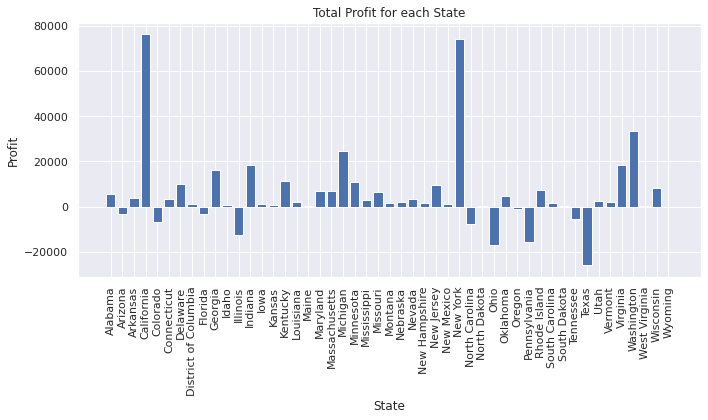

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
ax.bar(prof_df['State'],prof_df['Profit']) 
ax.set_title(label="Total Profit for each State", loc='center', pad=None)
ax.set_ylabel('Profit')
ax.set_xlabel('State')
ax.set_xticklabels(prof_df['State'],rotation=90)
plt.tight_layout();

In [ ]:
trace1=go.Bar(x=df.groupby('City')['Profit'].sum().nlargest(20).index,
      y=df.groupby('City')['Profit'].sum().nlargest(20))
iplot([trace1])

**Conclusion:**


1.  Company enjoys a profit of **57%** when **shipping mode** is standard on the other hand,same day profit is very less as compared to other three.
2.   **Technology** provides maximum profit due to maximum sales which is **51%**.

3.  Large amount of profit is acquired from west region which also records maximum sales.We must **avoid giving huge discount to south region** inorder to increase our profit.
4.  California is the state which enjoys maximum profit i.e **$76215.9705**




5.  NewYork is the city with maximum profit.
6. Thus company should open more stores in New York City,Los Angeles and States like California.











##**Loss Analysis**

In [ ]:
state_negative=prof_df.loc[prof_df.Profit < 0]
state_negative

,State,Profit
1,Arizona,-3427.9246
4,Colorado,-6527.8579
8,Florida,-3399.3017
11,Illinois,-12593.2976
31,North Carolina,-7490.9122
33,Ohio,-16959.3178
35,Oregon,-1194.0993
36,Pennsylvania,-15591.3148
40,Tennessee,-5341.6936
41,Texas,-25753.1635


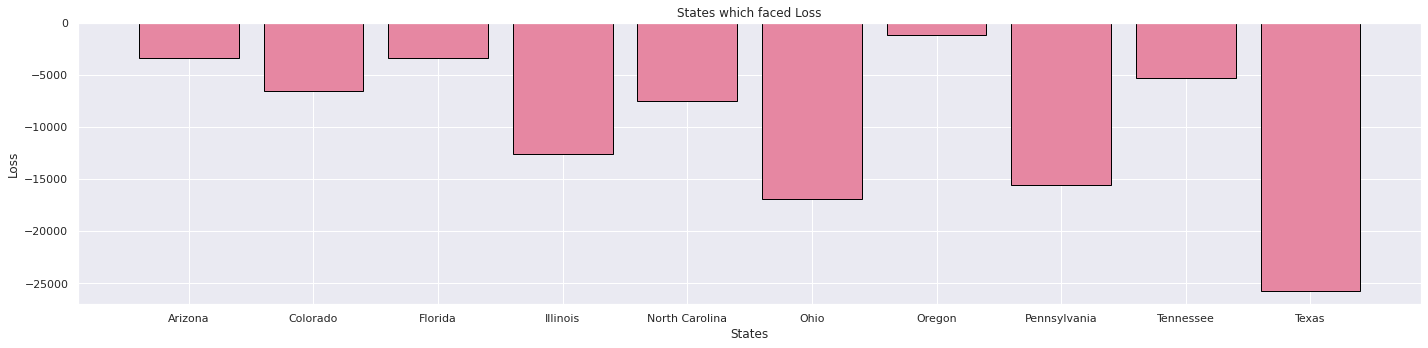

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))
def plot_state(ax):
    ax.bar(state_negative['State'],state_negative['Profit'],color='#e687a2',edgecolor='black') 
#ax.legend(label, loc='upper center', fontsize='large',edgecolor='black', borderpad=1.0, shadow=True, handlelength=0)
    ax.set_title(label="States which faced Loss", loc='center', pad=None)
    ax.set_ylabel('Loss')
    ax.set_xlabel('States')
plot_state(ax)
plt.tight_layout()

In [ ]:
trace1=go.Bar(x=df.groupby('City')['Profit'].sum().nsmallest(20).index,
      y=df.groupby('City')['Profit'].sum().nsmallest(20))
iplot([trace1])

In [ ]:
prof_df = df.groupby('Sub-Category', as_index=False)['Profit'].sum()
prof_df.head()

,Sub-Category,Profit
0,Accessories,41920.9052
1,Appliances,18138.0054
2,Art,6511.8388
3,Binders,30205.2603
4,Bookcases,-3398.7542


In [ ]:
x=df.groupby('Sub-Category')['Profit'].sum().nsmallest(20)
print(x)

Sub-Category
Tables        -17725.4811
Bookcases      -3398.7542
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5499.1558
Art             6511.8388
Envelopes       6964.1767
Furnishings    13042.0534
Appliances     18138.0054
Storage        21287.1788
Chairs         26567.1278
Binders        30205.2603
Paper          33830.0381
Accessories    41920.9052
Phones         44493.0524
Copiers        55617.8249
Name: Profit, dtype: float64


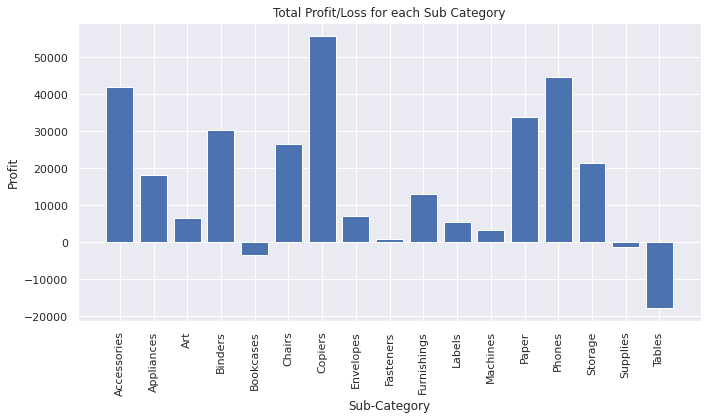

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
ax.bar(prof_df['Sub-Category'],prof_df['Profit']) 
ax.set_title(label="Total Profit/Loss for each Sub Category", loc='center', pad=None)
ax.set_ylabel('Profit')
ax.set_xlabel('Sub-Category')
ax.set_xticklabels(prof_df['Sub-Category'],rotation=90)
plt.tight_layout();

**Conclusion:**

1.**Texas** faced maximum loss -**$25753.1635**.


2.Loss incurred by**Ohio is $16959.3178**.Company needs to find factors responsible for these losses occurring in these states and rectify them.  



3.**Philadelphia** and **Houston** are two cities where company is facing maximum loss.



4.Company is facing huge loss in sale of **Tables -$17725.4811** Although there is a good amount of sales of tables. Thus we can conclude, 
**Loss Leader Strategy** is being followed.




##**Discount Analysis**

Text(0.5, 1.0, 'Analysis of Sales  wrt Discount')

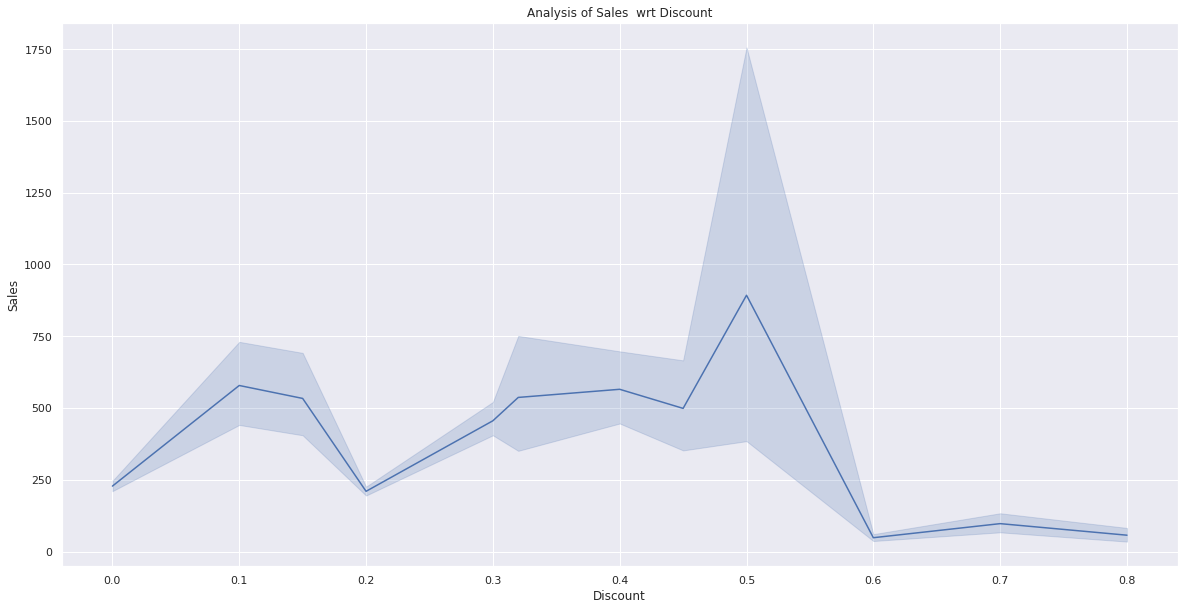

In [ ]:
plt.figure(figsize=(20,10))

sns.lineplot(x=df['Discount'], y=df['Sales'])

plt.title("Analysis of Sales  wrt Discount")


Text(0.5, 1.0, 'Analysis of Discount  wrt Profit')

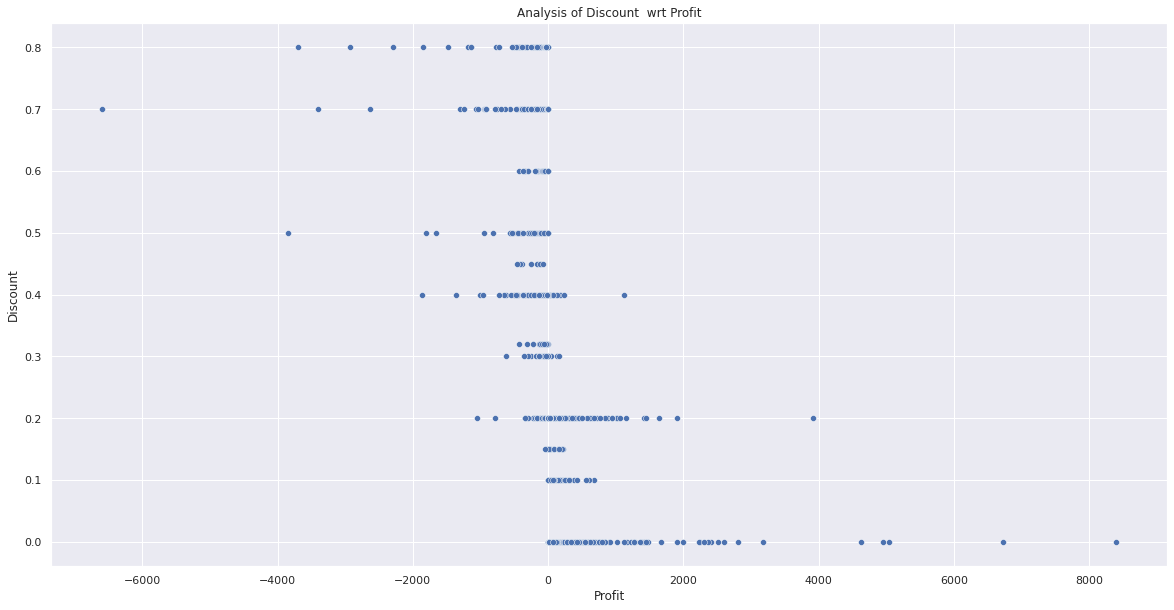

In [ ]:
plt.figure(figsize=(20,10))

sns.scatterplot(x=df['Profit'], y=df['Discount'])

plt.title("Analysis of Discount  wrt Profit")




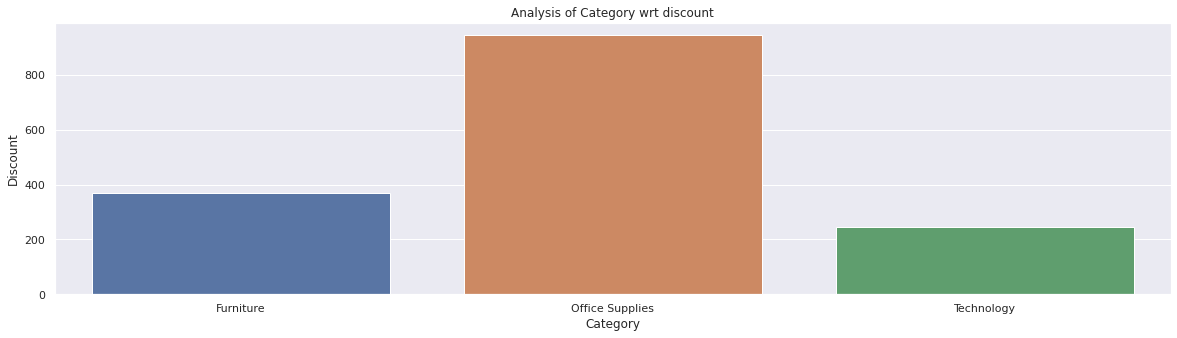

In [ ]:
x=df['Category'].unique()
x.sort()

y=df.groupby(['Category'])['Discount'].sum()
sns.barplot(x=x, y=y)
plt.title("Analysis of Category wrt discount")
plt.xlabel("Category")
plt.ylabel("Discount")
plt.show()

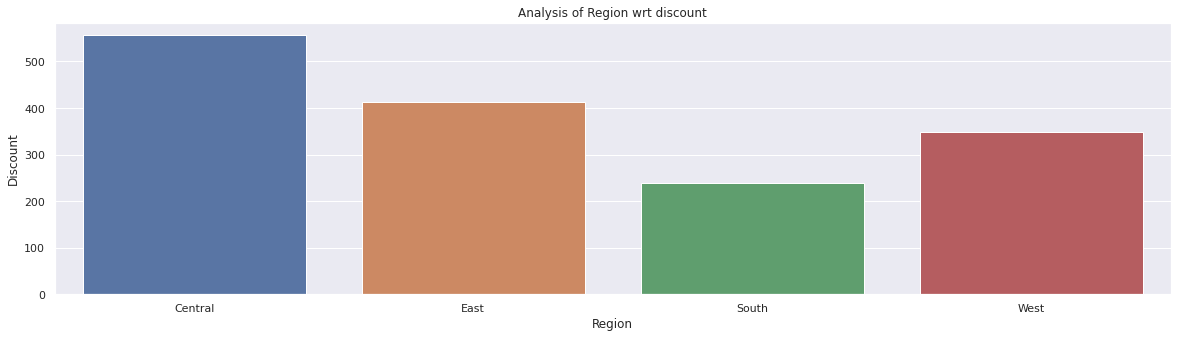

In [ ]:
x=df['Region'].unique()
x.sort()

y=df.groupby(['Region'])['Discount'].sum()
sns.barplot(x=x, y=y)
plt.title("Analysis of Region wrt discount")
plt.xlabel("Region")
plt.ylabel("Discount")
plt.show()

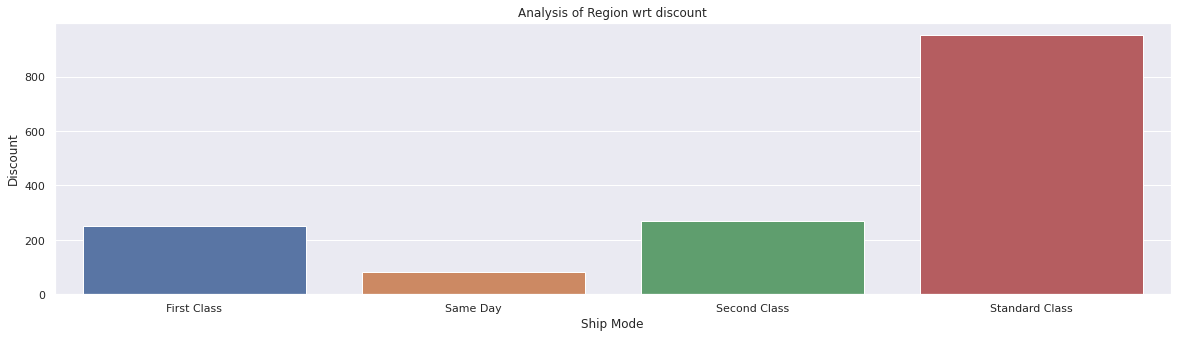

In [ ]:
x=df['Ship Mode'].unique()
x.sort()

y=df.groupby(['Ship Mode'])['Discount'].sum()
sns.barplot(x=x, y=y)
plt.title("Analysis of Region wrt discount")
plt.xlabel("Ship Mode")
plt.ylabel("Discount")
plt.show()


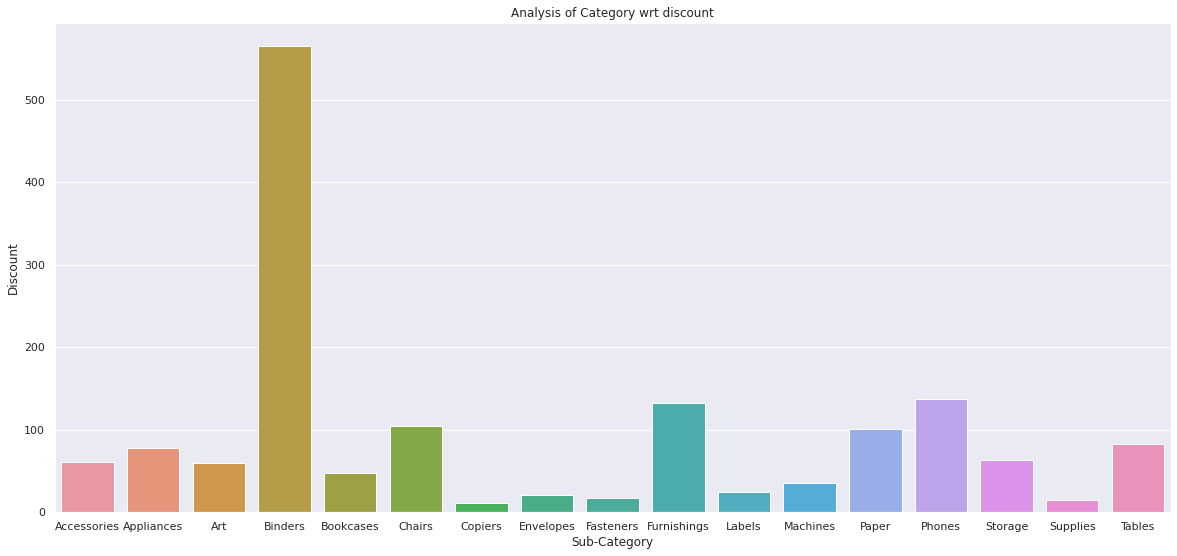

In [ ]:
x=df['Sub-Category'].unique()
x.sort()
plt.figure(figsize=(20,9))

y=df.groupby(['Sub-Category'])['Discount'].sum()
sns.barplot(x=x, y=y)
plt.title("Analysis of Category wrt discount")
plt.xlabel("Sub-Category")
plt.ylabel("Discount")
plt.show()

**Conclusion:**

1. **Sales** of goods is recorded as **best** when discount is **50%** .Most of the customers prefer discount of  **10%,30%,40% and 50%**.Above this discount, not such good sales is observed ,reason being:Customer is aware that company wants to clear up stocks of those products.

2. **Scatterplot** infrences that **most profit** is acquired by selling goods with **discount range 0-40%**.Above this, usually loss is incurred.
3.  **Office category** has maximum number of products,average sales,**43% profit share** thus giving highest discount is plausible.


4. **Central region **has average number of sales ,but minimum proit share i.e. only **14% **and it has maximum discount **$500** thus company is trying to lure customers and increase profit.
5.**Bookcase and Tables** are sold at good discount because of their contibution in loss to company.



6.   **Standard class ship** mode is preferred by most customer followed by second class
Standard Class ship Mode generates **highest profit** by having **max sales and giving max discount.**
7.**Technology** gives **most profit with least discount** so more technological products should be sold by the company.


   
8. **Art** Sub-Category have the **highest profit with least discount**, so we must promote more Art category product.





